In [1]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
%matplotlib inline
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 13

In [2]:
def load_sound_files(file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load(fp, sr=None)
        
        print('extracting %s' % (fp), len(X), sr)
        raw_sounds.append(X)
    return raw_sounds

def plot_waves(sound_names,raw_sounds):
    
    print("In plot_waves")
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        print("plotting", n, f)
        plt.subplot(10,1,i)
        librosa.display.waveplot(np.array(f), sr=16000)
        plt.title(n.title())
        i += 1
        
    print("after for")
    plt.suptitle('Figure 1: Waveplot',x=0.5, y=0.915,fontsize=18)
    plt.show()
    
def plot_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        specgram(np.array(f), Fs=16000)
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 2: Spectrogram',x=0.5, y=0.915,fontsize=18)
    plt.show()

def plot_log_power_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        D = librosa.logamplitude(np.abs(librosa.stft(f))**2, ref_power=np.max)
        librosa.display.specshow(D,x_axis='time' ,y_axis='log')
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 3: Log power spectrogram',x=0.5, y=0.915,fontsize=18)
    plt.show()

In [3]:
class_labels = {
    'down' : 3,
    'left' : 1,
    'right': 0,
    'up'   : 2,
    'on'   : 4,
    'off'  : 5
}

def windows(data, window_size):
    start = 0
    while start < len(data):
        yield int(start), int(start + window_size)
        start += window_size

def extract_mfccs(X, sample_rate, time_interval=0.1, num_mfcc=40):
    
    mfccs = np.array([])
    window_size = int(len(X) / 10)
    
    for (start,end) in windows(X, window_size):
        if len(X[start:end]) != window_size:
            continue
        mfcc = np.mean(librosa.feature.mfcc(y=X[start:end], sr=sample_rate, n_mfcc=num_mfcc).T,axis=0)
        
        mfccs = np.append(mfccs, mfcc)
    
    return mfccs

def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name, sr=None)
    stft = np.abs(librosa.stft(X))
    
    mfccs = extract_mfccs(X, sample_rate)
    mfcc_whole_audio = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate
(y=X).T, axis=0)
    return mfccs, mfcc_whole_audio, chroma,mel,contrast,tonnetz,zero_crossing_rate

def parse_audio_files(parent_dir, sub_dirs, file_ext='*.wav'):
    
#     +32 -40 +360
    features, labels = np.empty((0, 594)), np.empty(0)
    for _, sub_dir in enumerate(sub_dirs):
        
        print("Working on %s" % sub_dir)
        for cnt, fn in enumerate(glob.glob(os.path.join(parent_dir, sub_dir, file_ext))):
            mfccs, mfcc_whole_audio, chroma, mel, contrast,tonnetz, zero_crossing_rate = extract_feature(fn)
            ext_features = np.hstack([mfccs,mfcc_whole_audio,chroma,mel,contrast,tonnetz, zero_crossing_rate])
            features = np.vstack([features, ext_features])
            labels = np.append(labels, class_labels[sub_dir])
            
            if cnt > 0 and cnt % 200 == 0:
                print("Processed %d files" % cnt)
            
    return np.array(features), np.array(labels, dtype = np.int)

In [4]:
parent_dir = 'dataset'

sub_dirs = ['down', 'up', 'on', 'off', 'left', 'right']

features, labels = parse_audio_files(parent_dir, sub_dirs)

Working on down


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


Processed 200 files
Processed 400 files
Processed 600 files
Processed 800 files
Processed 1000 files
Processed 1200 files
Processed 1400 files
Processed 1600 files
Processed 1800 files
Processed 2000 files
Processed 2200 files
Working on up
Processed 200 files
Processed 400 files
Processed 600 files
Processed 800 files
Processed 1000 files
Processed 1200 files
Processed 1400 files
Processed 1600 files
Processed 1800 files
Processed 2000 files
Processed 2200 files
Working on on
Processed 200 files
Processed 400 files
Processed 600 files
Processed 800 files
Processed 1000 files
Processed 1200 files
Processed 1400 files
Processed 1600 files
Processed 1800 files
Processed 2000 files
Processed 2200 files
Working on off
Processed 200 files
Processed 400 files
Processed 600 files
Processed 800 files
Processed 1000 files
Processed 1200 files
Processed 1400 files
Processed 1600 files
Processed 1800 files
Processed 2000 files
Processed 2200 files
Working on left
Processed 200 files
Processed 400

In [8]:
np.savetxt("ml_features.csv", features, delimiter=",")
np.savetxt("ml_labels.csv", labels, delimiter=",")

In [146]:
from sklearn.model_selection import train_test_split

X_all, _, y_all, _ = train_test_split(
    features, labels, stratify=labels, train_size=0.5, random_state=42)

In [199]:


cnt = list(map(lambda x: labels.tolist().count(x), [i for i in range(5)]))
print(cnt)
np.histogram(cnt, bins=5)

[2359, 2372, 2353, 2367, 2375]


(array([1, 1, 0, 1, 2]),
 array([ 2353. ,  2357.4,  2361.8,  2366.2,  2370.6,  2375. ]))

In [147]:
print(X_all.shape)
print(y_all.shape)


X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, stratify=y_all, train_size=0.9, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(y_train)

(5913, 594)
(5913,)
(5321, 594)
(592, 594)
(5321,)
(592,)
[2 2 2 ..., 0 1 4]


In [158]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, stratify=labels, train_size=0.9, random_state=42)

print(X_train.shape)
clf = SVC(kernel='rbf', C=10, gamma=0.1, decision_function_shape='ovo')
clf.fit(X_train, y_train)

print("Training set score: {:.3f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(X_test, y_test)))

(10643, 594)
Training set score: 0.997
Test set score: 0.831


In [156]:
from sklearn.metrics import confusion_matrix

y_test_pred = clf.predict(X_test)

conf_mat = confusion_matrix(y_test, y_test_pred)

print(conf_mat)
for idx, arr in enumerate(conf_mat):
    print(list(map(lambda d: float(format(d/sum(arr), '.3f')), arr)))

[[196  22   4   8   6]
 [ 21 195   3   5  13]
 [ 13  10 187  15  10]
 [  8  10  12 202   5]
 [  5  14  13   3 203]]
[0.831, 0.093, 0.017, 0.034, 0.025]
[0.089, 0.823, 0.013, 0.021, 0.055]
[0.055, 0.043, 0.796, 0.064, 0.043]
[0.034, 0.042, 0.051, 0.852, 0.021]
[0.021, 0.059, 0.055, 0.013, 0.853]


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}

clf = SVC(kernel='rbf')

grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=100)

grid_search.fit(X_train, y_train)

print("Test set score: {:.3f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


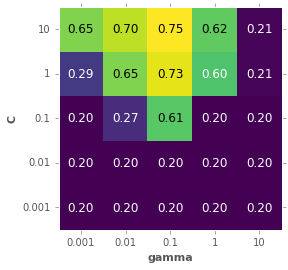

In [149]:
import pandas as pd
from mglearn.tools import heatmap
# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)

scores = np.array(results.mean_test_score).reshape(5, 5)
# plot the mean cross-validation scores
heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis");